In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
- Create dataset Ys_0, Ys_1, Y_0, Y_1, D, Y

In [2]:
def ccn_model(eta_star, beta, alpha):
    return (1 - beta - alpha)*eta_star + alpha

def eta(x, d):
    if d==0:
        return .5 + .5 * np.sin(2.9*x + .1)
    elif d==1:
        return .5 + .5 * np.sin(2.9*x+.5)

def pi(x):
#     return .6+.2*np.sin(2.9*x+.1)

    return np.piecewise(x,[
                ((-1 <= x) & (x <= .5976)),
                ((.5976 < x) & (x <= 1))],  
                [lambda v: .55 + .3*np.sin(4.45*v+.65), 
                 lambda v: .0001*v + .5])


In [21]:
N = 300
alpha_0 = .08
alpha_1 = .15
beta_0 = .3
beta_1 = .05


In [40]:
X = np.linspace(-1,1, num=N)
Xs = np.random.uniform(-1, 1, size=N)

# Define outcome probabilities
PYs_0 = eta(Xs, 0)
PYs_1 = eta(Xs, 1)
PY_0 = ccn_model(PYs_0, alpha_0, beta_0)
PY_1 = ccn_model(PYs_1, alpha_1, beta_1)
PD = pi(Xs)

# Sample from probabilities 
Ys_0 = np.random.binomial(1, PYs_0)
Ys_1 = np.random.binomial(1, PYs_1)
Y_0 = np.random.binomial(1, PY_0)
Y_1 = np.random.binomial(1, PY_1)
D = np.random.binomial(1, PD)

# P Observed proxy
PYs = np.zeros_like(D, dtype=np.float32)
PY = np.zeros_like(D, dtype=np.float32)
Y = np.zeros_like(D)

PYs[D==0] = PYs_0[D==0]
PYs[D==1] = PYs_1[D==1]

PY[D==0] = PY_0[D==0]
PY[D==1] = PY_1[D==1]

Y[D==0] = Y_0[D==0]
Y[D==1] = Y_1[D==1]


exp_p = pd.DataFrame({
    'X': Xs,
    
    # Probabilities 
    'PYs_0': PYs_0,
    'PYs_1': PYs_1,
    'PY_0': PY_0,
    'PY_1': PY_1,
    'PYs': PYs,
    'PY': PY,
    'PD': PD,
    
    # Sampled values
    'Ys_0': np.random.binomial(1, PYs_0),
    'Ys_1': np.random.binomial(1, PYs_1),
    'Y_0': np.random.binomial(1, PY_0),
    'Y_1': np.random.binomial(1, PY_1),
    'Y': Y,
    'D': D,
})


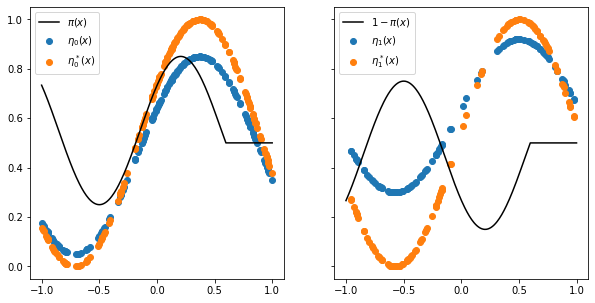

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.plot(X, pi(X), label='$\pi(x)$', color='k')
ax1.scatter(exp_p[D==1]['X'], exp_p[D==1]['PY'], label='$\eta_0(x)$')
ax1.scatter(exp_p[D==1]['X'], exp_p[D==1]['PYs'], label='$\eta_0^*(x)$')
ax1.legend()

ax2.plot(X, 1-pi(X), label='$1-\pi(x)$', color='k')
ax2.scatter(exp_p[D==0]['X'], exp_p[D==0]['PY'], label='$\eta_1(x)$')
ax2.scatter(exp_p[D==0]['X'], exp_p[D==0]['PYs'], label='$\eta_1^*(x)$')

ax2.legend()


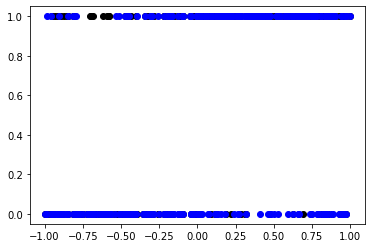

In [49]:
fig  = plt.subplots(1, 1, sharey=True)
plt.scatter(exp_p['X'], exp_p['Y_0'], color='k', label='')
plt.scatter(exp_p['X'], exp_p['Y_1'], color='b', label='')

### Key questions to think about: 
- What does using a re-weighting approach (e.g., IPW) get you in addition to just doing a conditional outcome regression? 
- Does sample weighting via IPW improve convergence? 
- How is having less data in a region of X related to calibration? Generally how does calibration work in a counterfactual estimation setting? 


### Interesting observations: 
- Approach 1 will do poorly exactly when approach 2 assumptions are satisfied
- Approach 2 will improve performance when approach 1 does not

### List of interesting things about first approach: 
Setting with group dependent noise will be even more important to model because noise parameters vary as a function of X. If there is an X that is high likelihood of intervention (incorrectly), especially difficult to estimate error parameters. 
- In this case, expert anchors assumption is bad
Generalization angle: 
- Can we use samples from other interventions to improve convergence? 

Calibration: 
- How does calibration of a classifer change as a function of sample size? 

We want to model different types of bias in D
- Humans over-assess risk for some individuals, observe more data under intervention and less under no intervention 

- You can use data from the conditional outcome regression only (D=0) and show consistancy as a function of data sampled over a region. 
- If there is little data under (D=0), can you use the (abundant) data under (D=1)? 



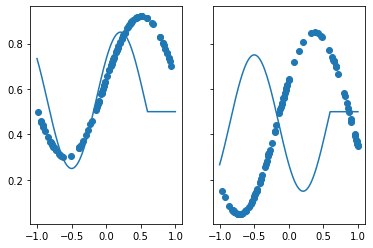

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.plot(X, 1-pi(X))
ax1.scatter(exp[exp['D']==0]['X'], exp[exp['D']==0]['PY_0'])

ax2.plot(X, pi(X))
ax2.scatter(exp[exp['D']==1]['X'], exp[exp['D']==1]['PY_1'])




In [39]:
np.random.binomial(1, pi(xs)) 

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

In [70]:
PY.dtype

dtype('int64')

array([0.3 , 0.92, 0.92, 0.3 , 0.3 , 0.3 , 0.92, 0.3 , 0.92, 0.92, 0.92,
       0.92, 0.92, 0.3 , 0.92, 0.3 , 0.92, 0.3 , 0.3 , 0.3 , 0.92, 0.3 ,
       0.92, 0.3 , 0.92, 0.92, 0.3 , 0.3 , 0.3 , 0.3 , 0.92, 0.3 , 0.92,
       0.92, 0.92, 0.92, 0.3 , 0.3 , 0.92, 0.92, 0.3 , 0.3 , 0.3 , 0.92,
       0.92, 0.3 , 0.3 , 0.92, 0.3 , 0.92, 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.92, 0.92, 0.3 , 0.92, 0.3 , 0.3 , 0.92, 0.92, 0.92, 0.92,
       0.3 , 0.92, 0.3 , 0.92, 0.3 , 0.92, 0.92, 0.92, 0.3 , 0.92, 0.92,
       0.3 , 0.3 , 0.3 , 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.3 , 0.3 ,
       0.3 ])

In [63]:
PY[D==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])